In [7]:
!sudo add-apt-repository -y ppa:potassco/stable
!sudo apt-get update
!apt install clingo
!pip install potassco

Repository: 'deb https://ppa.launchpadcontent.net/potassco/stable/ubuntu/ jammy main'
Description:
Contains the stable releases of systems from the https://potassco.org project.
More info: https://launchpad.net/~potassco/+archive/ubuntu/stable
Adding repository.
Found existing deb entry in /etc/apt/sources.list.d/potassco-ubuntu-stable-jammy.list
Adding deb entry to /etc/apt/sources.list.d/potassco-ubuntu-stable-jammy.list
Found existing deb-src entry in /etc/apt/sources.list.d/potassco-ubuntu-stable-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/potassco-ubuntu-stable-jammy.list
Adding key to /etc/apt/trusted.gpg.d/potassco-ubuntu-stable.gpg with fingerprint 7AA3F20F5BDCBF2F78090C08DE1AB6C94EFE9A64
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu

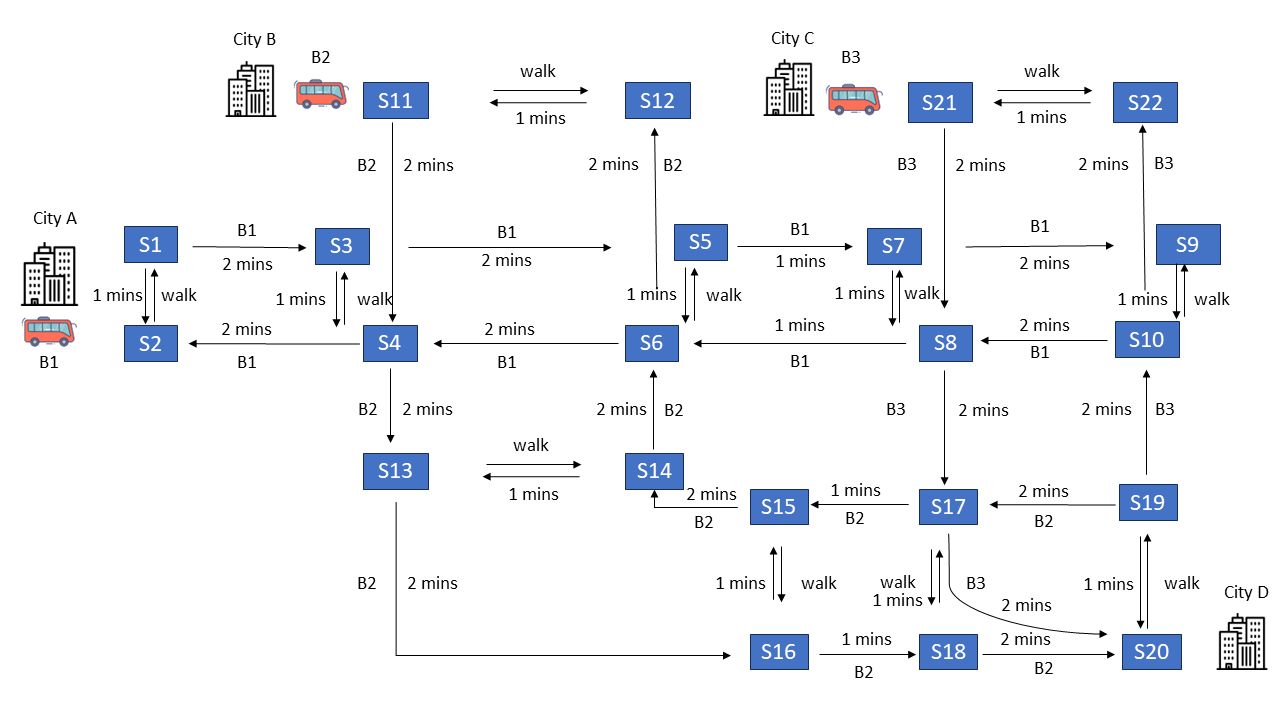

##Minimum Travel Exchange

In [8]:
code ="""

stop(s1). stop(s2). stop(s3). stop(s4). stop(s5). stop(s6). stop(s7). stop(s8). stop(s9). stop(s10). stop(s11). stop(s12).
stop(s13). stop(s14). stop(s15). stop(s16). stop(s17). stop(s18). stop(s19). stop(s20). stop(s21). stop(s22).

line(s1, s3, b1, 2). line(s3, s5, b1, 2). line(s5, s7, b1, 1). line(s7, s9, b1, 2). line(s10, s8, b1, 2). line(s8, s6, b1, 1). line(s6, s4, b1, 2). line(s4, s2, b1, 2).
line(s1, s2, w, 1). line(s2, s1, w, 1). line(s3, s4, w, 1). line(s4, s3, w, 1). line(s5, s6, w, 1). line(s6, s5, w, 1). line(s7, s8, w, 1). line(s8, s7, w, 1). line(s9, s10, w, 1). line(s10, s9, w, 1).
line(s11, s4, b2, 2). line(s4, s13, b2, 2). line(s13, s16, b2, 2). line(s16, s18, b2, 2). line(s18, s20, b2, 2). line(s19, s17, b2, 2). line(s17, s15, b2, 2). line(s15, s14, b2, 2). line(s14, s6, b2, 1). line(s6, s12, b2, 2).
line(s11, s12, w, 1). line(s12, s11, w, 1). line(s13, s14, w, 1). line(s14, s13, w, 1). line(s15, s16, w, 1). line(s16, s15, w, 1). line(s17, s18, w, 1). line(s18, s17, w, 1). line(s19, s20, w, 1). line(s20, s19, w, 1).
line(s21, s8, b3, 2). line(s8, s17, b3, 2). line(s17, s20, b3, 2). line(s19, s10, b3, 2). line(s10, s22, b3, 2).
line(s21, s22, w, 1). line(s22, s21, w, 1).

start(s1).
end(s20).

0 { selected(X,Y,Z) } 1 :- line(X,Y,Z,_).

path(X,Y) :- selected(X,Y,_).
path(X,Z) :- path(X,Y), path(Y,Z).
path(X, Z, W) :- path(X, Y, W), path(Y, Z, W).

:- start(X), end(Y), not path(X,Y).

cost(C) :- C = #count { X,Y,Z : selected(X,Y,Z) }.

#minimize { C : cost(C) }.

#show selected/3.
"""

with open('program1.lp', 'w') as file:
    file.write(code)


In [9]:
!clingo program1.lp

clingo version 5.7.1 (849f282)
Reading from program1.lp
Solving...
Answer: 1
selected(s1,s3,b1) selected(s3,s5,b1) selected(s5,s7,b1) selected(s8,s6,b1) selected(s6,s4,b1) selected(s4,s2,b1) selected(s2,s1,w) selected(s3,s4,w) selected(s4,s3,w) selected(s6,s5,w) selected(s7,s8,w) selected(s8,s7,w) selected(s9,s10,w) selected(s10,s9,w) selected(s11,s4,b2) selected(s4,s13,b2) selected(s13,s16,b2) selected(s16,s18,b2) selected(s18,s20,b2) selected(s17,s15,b2) selected(s15,s14,b2) selected(s14,s6,b2) selected(s6,s12,b2) selected(s11,s12,w) selected(s12,s11,w) selected(s13,s14,w) selected(s14,s13,w) selected(s15,s16,w) selected(s19,s20,w) selected(s20,s19,w) selected(s21,s8,b3) selected(s8,s17,b3) selected(s17,s20,b3) selected(s19,s10,b3) selected(s10,s22,b3) selected(s22,s21,w)
Optimization: 36
Answer: 2
selected(s1,s3,b1) selected(s3,s5,b1) selected(s5,s7,b1) selected(s7,s9,b1) selected(s8,s6,b1) selected(s6,s4,b1) selected(s4,s2,b1) selected(s2,s1,w) selected(s3,s4,w) selected(s4,s3,w) s

##Minimum Travel Time

In [10]:
code = """

stops(s1; s2; s3; s4; s5; s6; s7; s8; s9; s10; s11; s12; s13; s14; s15; s16; s17; s18; s19; s20; s21; s22).

line(s1, s3, b1, 2). line(s3, s5, b1, 2). line(s5, s7, b1, 2). line(s7, s9, b1, 2). line(s10, s8, b1, 2). line(s8, s6, b1, 2). line(s6, s4, b1, 2). line(s4, s2, b1, 2).
line(s1, s2, w, 1). line(s2, s1, w, 1). line(s3, s4, w, 1). line(s4, s3, w, 1). line(s5, s6, w, 1). line(s6, s5, w, 1). line(s7, s8, w, 1). line(s8, s7, w, 1). line(s9, s10, w, 1). line(s10, s9, w, 1).
line(s11, s4, b2, 2). line(s4, s13, b2, 2). line(s13, s16, b2, 2). line(s16, s18, b2, 1). line(s18, s20, b2, 2). line(s19, s17, b2, 2). line(s17, s15, b2, 1). line(s15, s14, b2, 2). line(s14, s6, b2, 1). line(s6, s12, b2, 2).
line(s11, s12, w, 1). line(s12, s11, w, 1). line(s13, s14, w, 1). line(s14, s13, w, 1). line(s15, s16, w, 1). line(s16, s15, w, 1). line(s17, s18, w, 1). line(s18, s17, w, 1). line(s19, s20, w, 1). line(s20, s19, w, 1).
line(s21, s8, b3, 2). line(s8, s17, b3, 2). line(s17, s20, b3, 2). line(s19, s10, b3, 2). line(s10, s22, b3, 2).
line(s21, s22, w, 1). line(s22, s21, w, 1).

start(s1).
end(s20).

0 { selected(X,Y,Z) } 1 :- line(X,Y,Z,_).

path(X,Y) :- selected(X,Y,_).
path(X,Z) :- path(X,Y), path(Y,Z).
path(X, Z, W) :- path(X, Y, W), path(Y, Z, W).

:- start(X), end(Y), not path(X,Y).

cost(C) :- C = #sum { W,X,Y,Z : line(X,Y,Z,W), selected(X,Y,Z) }.

#minimize { C : cost(C) }.

#show selected/3.
"""

with open('program2.lp', 'w') as file:
    file.write(code)


In [11]:
!clingo program2.lp

clingo version 5.7.1 (849f282)
Reading from program2.lp
Solving...
Answer: 1
selected(s1,s3,b1) selected(s3,s5,b1) selected(s5,s7,b1) selected(s7,s9,b1) selected(s8,s6,b1) selected(s4,s2,b1) selected(s2,s1,w) selected(s7,s8,w) selected(s10,s9,w) selected(s11,s4,b2) selected(s17,s15,b2) selected(s14,s6,b2) selected(s6,s12,b2) selected(s11,s12,w) selected(s12,s11,w) selected(s13,s14,w) selected(s14,s13,w) selected(s15,s16,w) selected(s16,s15,w) selected(s18,s17,w) selected(s20,s19,w) selected(s21,s8,b3) selected(s8,s17,b3) selected(s17,s20,b3) selected(s19,s10,b3) selected(s10,s22,b3) selected(s22,s21,w)
Optimization: 40
Answer: 2
selected(s1,s3,b1) selected(s3,s5,b1) selected(s5,s7,b1) selected(s7,s9,b1) selected(s4,s2,b1) selected(s2,s1,w) selected(s9,s10,w) selected(s10,s9,w) selected(s11,s4,b2) selected(s13,s16,b2) selected(s19,s17,b2) selected(s17,s15,b2) selected(s15,s14,b2) selected(s14,s6,b2) selected(s6,s12,b2) selected(s12,s11,w) selected(s14,s13,w) selected(s16,s15,w) selected